# Q3 - Adam

In [99]:
import numpy as np
from matplotlib import pyplot as plt
plt.set_cmap("gray") # Otherwise grayscale images look purple
%matplotlib inline

from IPython.display import display as d

In [2]:
trainxs = np.load("../comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0)).reshape(-1, 784, 1)
trainys = np.load("../comp0090_assignment_1_data/fashion-train-labels.npz").reshape((-1, 1))
devxs   = np.load("../comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0)).reshape(-1, 784, 1)
devys   = np.load("../comp0090_assignment_1_data/fashion-dev-labels.npz").reshape((-1, 1))

In [3]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)

(12000, 784, 1)
(12000, 1)
(1000, 784, 1)
(1000, 1)


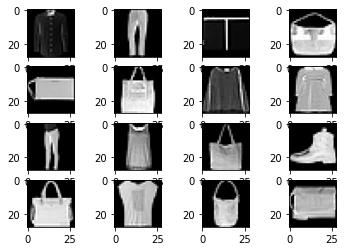

In [4]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(devxs))].reshape(28, 28))

In [5]:
def fd(x, W_1, W_2, W_3, b_1, b_2, b_3, epsilon=0.01):
    num = f(x + 0.5*epsilon, W_1, W_2, W_3, b_1, b_2, b_3) - f(x - 0.5*epsilon, W_1, W_2, W_3, b_1, b_2, b_3)
    den = epsilon
    return (num / den)

In [219]:
sigmoid = lambda x: 1/(1 + np.exp(-x))
sigmoid_prime = lambda x: sigmoid(x) * (1 - sigmoid(x))
init_param = lambda shape: np.random.random(shape) / 100

class ThreeLayerPerceptron():
    def __init__(self, Din, h1, h2):
        self.Din = Din
        self.h1 = h1
        self.h2 = h2
        self.Dout = 1
        
        self.W1 = init_param((self.h1, self.Din))
        self.W2 = init_param((self.h2, self.h1))
        self.W3 = init_param((1, self.h2))
        self.b1 = init_param((self.h1, 1))
        self.b2 = init_param((self.h2, 1))
        self.b3 = init_param((self.Dout, self.Dout))
    
    def forward(self, x, W1=None, b1=None, W2=None, b2=None, W3=None, b3=None):
        """
        Parameters
        ----------
        x : np.array(Din, 1)
            Individual datapoint

        
        Returns
        -------
        ypred : np.array(1)
            Predicted Y
        """
        if W1 is None:
            W1 = self.W1
        if b1 is None:
            b1 = self.b1
        if W2 is None:
            W2 = self.W2
        if b2 is None:
            b2 = self.b2
        if W3 is None:
            W3 = self.W3
        if b3 is None:
            b3 = self.b3
        
        h1 = sigmoid(W1 @ x + b1)
        h2 = sigmoid(W2 @ h1 + b2)
        h3 = sigmoid(W3 @ h2 + b3)
        ypred = h3
        return ypred
    
    def backward(self, ):
        # Forward
        h1 = sigmoid(self.W1 @ x + self.b1)
        h2 = sigmoid(self.W2 @ h1 + self.b2)
        h3 = sigmoid(self.W3 @ h2 + self.b3)
        ypred = h3
        
        # Backward
        error3 = ypred - y
        b3u = error3
        w3u = error3

In [220]:
loss = lambda y_pred, y: (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
loss_prime = lambda y_pred, y: (y_pred - y) / (y_pred - (y_pred ** 2))

In [227]:
# def grad_b3(b3, i, m):
# #     error3 = m.forward(trainxs[i], b3=b3)
#     x = trainxs[i]
#     h1 = sigmoid(m.W1 @ x + m.b1)
#     h2 = sigmoid(m.W2 @ h1 + m.b2)
#     h3 = (m.W3 @ h2 + m.b3)
#     error3 = sigmoid_prime(h3)
#     return error3

# def grad_b3fd(b3p, i, m):
#     epsilon = 0.0000001
#     upper = (m.forward(trainxs[i], b3=(b3p + epsilon)))
#     lower = (m.forward(trainxs[i], b3=(b3p - epsilon))) 
#     fd = (upper - lower) / (2 * epsilon)
#     return (fd)

# for i in range(10):
#     b3p = init_param((m.Dout, m.Dout))
#     iData = np.random.randint(0, nData)
    
#     print(grad_b3(b3p, iData, m), grad_b3fd(b3p, iData, m))

In [228]:
def dL_db3_an(b3p, i, m):
    x = trainxs[i]
    y = trainys[i]
    
    # Forward Pass
    h1 = m.W1 @ x + m.b1
    h1A = sigmoid(h1)
    h2 = m.W2 @ h1A + m.b2
    h2A = sigmoid(h2)
    h3 = m.W3 @ h2A + b3p # b3prime
    f = sigmoid(h3) # y prediction
    L = loss(f, y)
    
    # Backward Pass
    dh3_db3 = 1
    df_dh3 = sigmoid_prime(h3)
    dL_df = loss_prime(f, y)
    
    dL_db3 = dL_df * df_dh3 * dh3_db3
    
    return dL_db3

def dL_db3_fd(b3p, i, m, epsilon = 0.000000001):
    upper = loss(m.forward(trainxs[i], b3=(b3p + epsilon)), trainys[i])
    lower = loss(m.forward(trainxs[i], b3=(b3p - epsilon)), trainys[i]) 
    return (upper - lower) / (2 * epsilon)

In [264]:
def dL_db2_an(b2p, i, m):
    x = trainxs[i]
    y = trainys[i]
    
    # Forward Pass
    h1 = m.W1 @ x + m.b1
    h1A = sigmoid(h1)
    h2 = m.W2 @ h1A + b2p # b2 prime
    h2A = sigmoid(h2)
    h3 = m.W3 @ h2A + m.b3
    f = sigmoid(h3) # y prediction
    L = loss(f, y)
    
    # Backward Pass
    dh2_db2 = 1
    dh2A_dh2 = sigmoid_prime(h2)
    dh3_dh2A = m.W3
    df_dh3 = sigmoid_prime(h3)
    dL_df = loss_prime(f, y)
    
    dL_db2 = dL_df * df_dh3 * (dh3_dh2A @ dh2A_dh2) * dh2_db2
    
    return dL_db2

def dL_db2_fd(b2p, i, m, epsilon = 0.000000001):
    upper = loss(m.forward(trainxs[i], b2=(b2p + epsilon)), trainys[i])
    lower = loss(m.forward(trainxs[i], b2=(b2p - epsilon)), trainys[i]) 
    return (upper - lower) / (2 * epsilon)

## Test Suite

In [265]:
def test(param, analytical, fd, m):
    for i in range(1):
        iData = np.random.randint(0, nData)
        an = analytical(param, iData, m)
        fdiff = fd(param, iData, m)
        print(an, fdiff)
#         print(analytical(param, iData, m)[:20], fd(param, iData, m)[:20])

In [267]:
nData, imageDims, _ = trainxs.shape
m = ThreeLayerPerceptron(imageDims, 100, 10)

W1p = init_param((m.h1, m.Din))
W2p = init_param((m.h2, m.h1))
W3p = init_param((1, m.h2))
b1p = init_param((m.h1, 1))
b2p = init_param((m.h2, 1))
b3p = init_param((m.Dout, m.Dout))

# print("b_3:")
# test(b3p, dL_db3_an, dL_db3_fd, m)
print("b_2:")
test(b2p, dL_db2_an, dL_db2_fd, m)

b_3:
b_2:
[[0.00674707]] [[0.00674705]]


In [159]:
# Sanity check with y=x^2
# x = 5.432
# c = 1.234
# forward = lambda x, c: x**2 + c

# def gradx2fd(x, c):
#     epsilon = 0.0000001
#     upper = forward(x + epsilon, c)
#     lower = forward(x - epsilon, c)
#     fd = (upper - lower) / (2 * epsilon)
#     return (fd)

# gradx2 = lambda x, c: 2 * x
# d(gradx2(x, c))
# d(gradx2fd(x, c))

# def gradx2fd(x, c):
#     epsilon = 0.0000001
#     upper = forward(x, c + epsilon)
#     lower = forward(x, c - epsilon)
#     fd = (upper - lower) / (2 * epsilon)
#     return (fd)

# gradx2 = lambda x, c: 1 

# d(gradx2(x, c))
# d(gradx2fd(x, c))

10.864

10.86400001071297

1

0.999999993922529